
# Stochastic Simulation: Discrete Random Variable (DRV)

In [6]:
import math
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as st
import random as rd
from operator import add

import TidySimStat as tss

from importlib import reload  
tss = reload(tss)

`TidySimStat.py` by Edward J. Xu is imported. Last modifed date is June 1, 2020.


## 1. Inverse Transform Method / Direct Method / Crude Method

## 2. Rejection Method / Acceptance-Rejection Method

In [2]:
help(tss.sim_drv_reject)

Help on function sim_drv_reject in module TidySimStat.DRV:

sim_drv_reject(pmf: list)
    Rejection method to simulate realisations of a discrete random variables
    with `random.random()` and uniform distribution as basis functions.
    
    Keyworkd Argument
    pmf: probablity mass function of the desired discrete random variable.
    
    Attentions
    - The possible values of the desired DRV is 1, 2, 3, ..., j.
    - Whenever `p_j` is larger than 0, `q_j` should be larger than 0, or there
      is no way to simulate the realisation being j for the desired
      distribution. For the sake of simplicity, the uniform distribution over
      all possible indices is used as basis random variable.



In [3]:
# def exam_sim_drv_reject():
pmf = [7/16, 1/4, 1/8, 3/16]
tss.sim_drv_reject(pmf)

1

In [7]:
tss.exam_sim_drv(tss.sim_drv_reject())

TypeError: sim_drv_reject() missing 1 required positional argument: 'pmf'

Chi-squared goodness of fit test: 2.8575.
The input stat: 2.8575. 
The p value from Chi-Square distribution: 0.7219.
Null hypothesis: two populations have the same distribution. 
The input p value is 0.7219. 
Is the p value smaller than 0.05? False. 
If reject the null hypothesis? False. 
If from the same distribution? True.


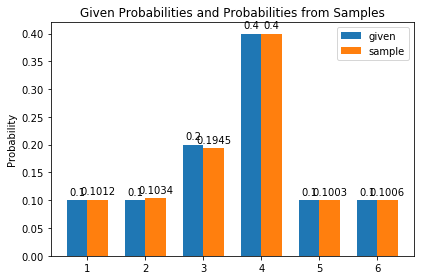

In [22]:
def exam_sim_drv_reject():
    num_sim = 10000
#     p = w
    p = [0.1, 0.1, 0.2, 0.4, 0.1, 0.1]
    n = len(p)
    
    xs = [tss.sim_drv_reject(p) for l in range(num_sim)]
    p_sample = [xs.count(l) / num_sim for l in range(1, n+1)]
    
    ## KS test
    li_count = [xs.count(l) for l in range(1, n+1)]
    li_cdf = tss.pmf2cdf(p)
    stat = cal_stat_gof(li_count, li_cdf)
    pvalue = cal_pvalue_chi2(stat, df=5)
    tss.test_dist(pvalue)
    
    ## Start plotting.
    labels = [l for l in range(1, n+1)]

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, p, width, label='given')
    rects2 = ax.bar(x + width/2, p_sample, width, label='sample')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Probability')
    ax.set_title('Given Probabilities and Probabilities from Samples')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()

    plt.show()


exam_sim_drv_reject()

## 2. Alias Method

In [12]:
help(tss.check_posi_pmf)

Help on function check_posi_pmf in module TidySimStat.auxiliary:

check_posi_pmf(li: list, if_mute=True)
    Check if input probability mass function represented by a list is
    a `n`-point positive probability mass function.



In [13]:
help(tss.find_ij)

Help on function find_ij in module TidySimStat.DRV:

find_ij(p)
    Find the index i, j in the apas method for generating
    discrete random variables.
    
    Issues
    There are many numerical issues. I have tried to solve most of them.
    Details can be found in comments.



In [14]:
help(tss.set_alias)

Help on function set_alias in module TidySimStat.DRV:

set_alias(p)
    Set up alias for a positive probability mass function.
    
    Keyword Arguments
    p: list indicating `n`-point positive PMF
    
    Local Variables
    ps: dict of PMF "p"
    qs: dict of PMF "q"
    qis: dict of `i` values in each iteration
    qjs: dict of `j` values in each iteration
    
    Issues
    - Not sure if the `i` and `j` in the final iteration is right.
      For now, the index of the smaller one is assumed to be `i`.
    - Mathematically, `(n-k)` is indicating the number of points
      in the current positive PMF. Sometimes, when there are two
      identical values in the PMF, one iteration can reduce two
      probability points to zero. That way, the PMF in the final
      iteration will have only one point. For example, try PMF
      `[0.1, 0.1, 0.2, 0.4, 0.1, 0.1]`. Besides, it is likely that
      such iterations will happen more than once. So the number of
      necessary iteration may 

In [16]:
def exam_set_alias():
#     p = [7/16, 0.5, 1/16]
    p = [7/16, 1/4, 1/8, 3/16]
#     p = [0.1, 0.1, 0.2, 0.4, 0.1, 0.1]
#     p = [0.2, 0.2, 0.2, 0.2, 0.2]
    alias = tss.set_alias(p)
    print(alias)
    
    
exam_set_alias()

NameError: name 'greater' is not defined

In [ ]:
help(tss.run_alias)

In [ ]:
def exam_run_alias():
    num_sim = 10000
#     p = [7/16, 1/4, 1/8, 3/16]
    p = [0.1, 0.1, 0.2, 0.4, 0.1, 0.1]
    n = len(p)
    alias = set_alias(p)
    
    xs = [run_alias(alias) for l in range(num_sim)]
    p_sample = [xs.count(l) / num_sim for l in range(1, n+1)]
    
    ## Start plotting.
    labels = [l for l in range(1, n+1)]

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, p, width, label='given')
    rects2 = ax.bar(x + width/2, p_sample, width, label='sample')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Probability')
    ax.set_title('Given Probabilities and Probabilities from Samples')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()

    plt.show()


exam_run_alias()

## 3. Chi-Squared Goodness-of-Fit Test of Samples

In [ ]:
help(test_dist)

The function `cal_stat_gof` is a bit different from that in `RNG.ipynb`

In [18]:
def cal_stat_gof(li_count, li_cdf):
    """Calculate the statistic in Goodness of Fit test."""
    li_p = [li_cdf[0]] + [li_cdf[i] - li_cdf[i-1] for i in range(1, len(li_cdf))]
    n = sum(li_count)
    k = len(li_p)
    stat = sum( [(li_count[i] - n * li_p[i])**2 / n / li_p[i] for i in range(k)] )
    print(f"Chi-squared goodness of fit test: {stat:.4f}.")
    
    return stat

In [19]:
def cal_pvalue_chi2(stat, df):
    """Calculate the pvalue of two-sided t-test using Chi-Square distribution."""
    pvalue = 1 - st.chi2.cdf(stat, df)
    print(f"The input stat: {stat:.4f}. \n"
        f"The p value from Chi-Square distribution: {pvalue:.4f}.")
    return pvalue

In [ ]:
num_sim = 10000
#     p = [7/16, 1/4, 1/8, 3/16]
p = [0.1, 0.1, 0.2, 0.4, 0.1, 0.1]
n = len(p)
alias = set_alias(p)

xs = [run_alias(alias) for l in range(num_sim)]
li_count = [xs.count(l) for l in range(1, n+1)]

li_cdf = [0.1, 0.2, 0.4, 0.8, 0.9, 1]
stat = cal_stat_gof(li_count, li_cdf)
pvalue = cal_pvalue_chi2(stat, df=5)
test_dist(pvalue)

## Alias Method by the Teacher

In [ ]:
def set_alias_direct(p):
    k = len(p)
    l = [x for x in range(1, k+1)]
    f = [k * x for x in p]
    g = [i+1 for i, x in enumerate(f) if x >= 1]
    s = [i+1 for i, x in enumerate(f) if x <= 1]
    
    while len(s) > 0:  # and len(g) > 0
        ## To make sure that indices are integers
        i = int(g[0])
        j = int(s[0])
        
        l[j-1] = i
        f[i-1] = f[i-1] - (1 - f[j-1])
        if f[i-1] < 1 - 0.000001:
            del g[0]
            s = s + [i]
        del s[0]
    
    return f, l

In [ ]:
p = [0.1, 0.1, 0.2, 0.4, 0.1, 0.1]
# p = [7/16, 1/4, 1/8, 3/16]
# p = [7/16, 0.5, 1/16]
# p = [17/96, 1/12, 1/3, 1/4, 1/24, 11/96]
f, l = set_alias_direct(p)
print(f)
print(l)

In [ ]:
def run_alias_direct(f, l):
    k = len(f)
    i = rd.randint(1, k)
    if rd.random() <= f[i-1]:
        x = i
    else:
        x = l[i-1]
    return x

In [ ]:
def exam_run_alias_direct():
    num_sim = 10000
    p = [0.1, 0.1, 0.2, 0.4, 0.1, 0.1]
#     p = [7/16, 1/4, 1/8, 3/16]
#     p = [7/16, 0.5, 1/16]
#     p = [1/4, 1/2, 1/4]
#     p = [17/96, 1/12, 1/3, 1/4, 1/24, 11/96]
    n = len(p)
    f, l = set_alias_direct(p)
    
    xs = [run_alias_direct(f, l) for s in range(num_sim)]
    p_sample = [xs.count(s) / num_sim for s in range(1, n+1)]
    
    ## Start plotting.
    labels = [l for l in range(1, n+1)]

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, p, width, label='given')
    rects2 = ax.bar(x + width/2, p_sample, width, label='sample')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Probability')
    ax.set_title('Given Probabilities and Probabilities from Samples')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()

    plt.show()


exam_run_alias_direct()

In [ ]:
num_sim = 10000
p = [17/96, 1/12, 1/3, 1/4, 1/24, 11/96]
f, l = set_alias_direct(p)

xs = [run_alias_direct(f, l) for s in range(num_sim)]
li_count = [xs.count(l) for l in range(1, n+1)]

li_cdf = pmf2pdf(p)
stat = cal_stat_gof(li_count, li_cdf)
pvalue = cal_pvalue_chi2(stat, df=5)
test_dist(pvalue)